In [1]:
import pandas as pd
from StudentPlacementMetadata import StudentPlacementMetadata
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
dataset = pd.read_csv("Student-Placement.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


# Data Preprocessing

In [6]:
dataset.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [8]:
quant, qual = StudentPlacementMetadata.quanQual(dataset)

In [9]:
quant

['IQ',
 'Prev_Sem_Result',
 'CGPA',
 'Academic_Performance',
 'Extra_Curricular_Score',
 'Communication_Skills',
 'Projects_Completed']

In [10]:
qual

['College_ID', 'Internship_Experience', 'Placement']

In [11]:
dataset.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [12]:
univariate = pd.DataFrame(index=["Q1:25","Q2:50","Q3:75","Q4:100","IQR","1.5Rule","Lesser","Greater","Min","Max"],columns=quant)
for columnName in quant:
    univariate.loc["Q1:25", [columnName]] = dataset.describe()[columnName]["25%"]
    univariate.loc["Q2:50", [columnName]] = dataset.describe()[columnName]["50%"]
    univariate.loc["Q3:75", [columnName]] = dataset.describe()[columnName]["75%"]
    univariate.loc["Q4:100", [columnName]] = dataset.describe()[columnName]["max"]
    univariate.loc["IQR", [columnName]] = univariate.loc["Q3:75", [columnName]] - univariate.loc["Q1:25", [columnName]]
    univariate.loc["1.5Rule", [columnName]] = 1.5* univariate.loc["IQR", [columnName]]
    univariate.loc["Lesser", [columnName]] = univariate.loc["Q1:25", [columnName]] - univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Greater", [columnName]] = univariate.loc["Q3:75", [columnName]] + univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Min", [columnName]] = dataset[columnName].min()
    univariate.loc["Max", [columnName]] = dataset[columnName].max()

In [13]:
univariate

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
Q1:25,89.0,6.29,6.29,3.0,2.0,3.0,1.0
Q2:50,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Q3:75,110.0,8.79,8.77,8.0,8.0,8.0,4.0
Q4:100,158.0,10.0,10.46,10.0,10.0,10.0,5.0
IQR,21.0,2.5,2.48,5.0,6.0,5.0,3.0
1.5Rule,31.5,3.75,3.72,7.5,9.0,7.5,4.5
Lesser,57.5,2.54,2.57,-4.5,-7.0,-4.5,-3.5
Greater,141.5,12.54,12.49,15.5,17.0,15.5,8.5
Min,41,5.0,4.54,1,0,1,0
Max,158,10.0,10.46,10,10,10,5


In [14]:
lesser=[]
greater=[]
for columnName in univariate:
    if(univariate[columnName]["Min"]<univariate[columnName]["Lesser"]):
        lesser.append(columnName)
    if(univariate[columnName]["Max"]>univariate[columnName]["Greater"]):
        greater.append(columnName)

In [15]:
lesser

['IQ']

In [16]:
greater

['IQ']

In [17]:
for column in lesser:
    # Convert to float so decimals (57.5 etc.) are allowed
    dataset[column] = dataset[column].astype(float)

    dataset.loc[
        dataset[column] < univariate[column]["Lesser"],
        column
    ] = float(univariate[column]["Lesser"])

for column in greater:
    dataset[column] = dataset[column].astype(float)

    dataset.loc[
        dataset[column] > univariate[column]["Greater"],
        column
    ] = float(univariate[column]["Greater"])


In [18]:
dataset

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107.0,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97.0,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109.0,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122.0,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96.0,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119.0,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70.0,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89.0,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107.0,8.77,8.92,3,No,7,5,1,No


In [19]:
univariate = pd.DataFrame(index=["Q1:25","Q2:50","Q3:75","Q4:100","IQR","1.5Rule","Lesser","Greater","Min","Max"],columns=quant)
for columnName in quant:
    univariate.loc["Q1:25", [columnName]] = dataset.describe()[columnName]["25%"]
    univariate.loc["Q2:50", [columnName]] = dataset.describe()[columnName]["50%"]
    univariate.loc["Q3:75", [columnName]] = dataset.describe()[columnName]["75%"]
    univariate.loc["Q4:100", [columnName]] = dataset.describe()[columnName]["max"]
    univariate.loc["IQR", [columnName]] = univariate.loc["Q3:75", [columnName]] - univariate.loc["Q1:25", [columnName]]
    univariate.loc["1.5Rule", [columnName]] = 1.5* univariate.loc["IQR", [columnName]]
    univariate.loc["Lesser", [columnName]] = univariate.loc["Q1:25", [columnName]] - univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Greater", [columnName]] = univariate.loc["Q3:75", [columnName]] + univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Min", [columnName]] = dataset[columnName].min()
    univariate.loc["Max", [columnName]] = dataset[columnName].max()

In [20]:
univariate

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
Q1:25,89.0,6.29,6.29,3.0,2.0,3.0,1.0
Q2:50,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Q3:75,110.0,8.79,8.77,8.0,8.0,8.0,4.0
Q4:100,141.5,10.0,10.46,10.0,10.0,10.0,5.0
IQR,21.0,2.5,2.48,5.0,6.0,5.0,3.0
1.5Rule,31.5,3.75,3.72,7.5,9.0,7.5,4.5
Lesser,57.5,2.54,2.57,-4.5,-7.0,-4.5,-3.5
Greater,141.5,12.54,12.49,15.5,17.0,15.5,8.5
Min,57.5,5.0,4.54,1,0,1,0
Max,141.5,10.0,10.46,10,10,10,5


In [21]:
lesser=[]
greater=[]
for columnName in univariate:
    if(univariate[columnName]["Min"]<univariate[columnName]["Lesser"]):
        lesser.append(columnName)
    if(univariate[columnName]["Max"]>univariate[columnName]["Greater"]):
        greater.append(columnName)

In [22]:
lesser

[]

In [23]:
greater

[]

In [24]:
le = LabelEncoder()

# Apply label encoding
dataset['College_ID'] = le.fit_transform(dataset['College_ID'])

In [25]:
dataset

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,29,107.0,6.61,6.28,8,No,8,8,4,No
1,60,97.0,5.52,5.37,8,No,7,8,0,No
2,35,109.0,5.36,5.83,9,No,3,1,1,No
3,54,122.0,5.47,5.75,6,Yes,1,6,1,No
4,3,96.0,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,20,119.0,8.41,8.29,4,No,1,8,0,Yes
9996,97,70.0,9.25,9.34,7,No,0,7,2,No
9997,65,89.0,6.08,6.25,3,Yes,3,9,5,No
9998,44,107.0,8.77,8.92,3,No,7,5,1,No


# Univariate and Bivariate Analysis

# Univariate

In [27]:
univariate = pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","Q4:100","IQR","1.5Rule","Lesser","Greater","Min","Max"],columns=quant)
for columnName in quant:
    univariate.loc["Mean", [columnName]] = dataset[columnName].mean()
    univariate.loc["Median", [columnName]] = dataset[columnName].median()
    univariate.loc["Mode", [columnName]] = dataset[columnName].mode()[0]
    univariate.loc["Q1:25", [columnName]] = dataset.describe()[columnName]["25%"]
    univariate.loc["Q2:50", [columnName]] = dataset.describe()[columnName]["50%"]
    univariate.loc["Q3:75", [columnName]] = dataset.describe()[columnName]["75%"]
    univariate.loc["Q4:100", [columnName]] = dataset.describe()[columnName]["max"]
    univariate.loc["IQR", [columnName]] = univariate.loc["Q3:75", [columnName]] - univariate.loc["Q1:25", [columnName]]
    univariate.loc["1.5Rule", [columnName]] = 1.5* univariate.loc["IQR", [columnName]]
    univariate.loc["Lesser", [columnName]] = univariate.loc["Q1:25", [columnName]] - univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Greater", [columnName]] = univariate.loc["Q3:75", [columnName]] + univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Min", [columnName]] = dataset[columnName].min()
    univariate.loc["Max", [columnName]] = dataset[columnName].max()

In [28]:
univariate

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
Mean,99.47195,7.535673,7.532379,5.5464,4.9709,5.5618,2.5134
Median,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Mode,99.0,5.93,9.41,10,3,10,5
Q1:25,89.0,6.29,6.29,3.0,2.0,3.0,1.0
Q2:50,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Q3:75,110.0,8.79,8.77,8.0,8.0,8.0,4.0
Q4:100,141.5,10.0,10.46,10.0,10.0,10.0,5.0
IQR,21.0,2.5,2.48,5.0,6.0,5.0,3.0
1.5Rule,31.5,3.75,3.72,7.5,9.0,7.5,4.5
Lesser,57.5,2.54,2.57,-4.5,-7.0,-4.5,-3.5


In [29]:
freqTable = pd.DataFrame(columns=["Unique_Values","Frequency","Relative Frequency","Cusum"])

In [30]:
freqTable["Unique_Values"]=dataset["Academic_Performance"].value_counts().index
freqTable["Frequency"]=dataset["Academic_Performance"].value_counts().values
freqTable["Relative Frequency"]=(freqTable["Frequency"]/103)
freqTable["Cusum"]=freqTable["Relative Frequency"].cumsum()

In [31]:
freqTable

,Unique_Values,Frequency,Relative Frequency,Cusum
0,10,1044,10.135922,10.135922
1,7,1027,9.970874,20.106796
2,8,1025,9.951456,30.058252
3,4,1004,9.747573,39.805825
4,2,995,9.660194,49.466019
5,3,991,9.621359,59.087379
6,6,990,9.611650,68.699029
7,9,987,9.582524,78.281553
8,5,974,9.456311,87.737864
9,1,963,9.349515,97.087379


In [32]:
univariate = pd.DataFrame(index=["Mean","Median","Mode","Q1:25","Q2:50","Q3:75","Q4:100","IQR","1.5Rule","Lesser","Greater","Min","Max","kurtosis","skew","Var","Std"],columns=quant)
for columnName in quant:
    univariate.loc["Mean", [columnName]] = dataset[columnName].mean()
    univariate.loc["Median", [columnName]] = dataset[columnName].median()
    univariate.loc["Mode", [columnName]] = dataset[columnName].mode()[0]
    univariate.loc["Q1:25", [columnName]] = dataset.describe()[columnName]["25%"]
    univariate.loc["Q2:50", [columnName]] = dataset.describe()[columnName]["50%"]
    univariate.loc["Q3:75", [columnName]] = dataset.describe()[columnName]["75%"]
    univariate.loc["Q4:100", [columnName]] = dataset.describe()[columnName]["max"]
    univariate.loc["IQR", [columnName]] = univariate.loc["Q3:75", [columnName]] - univariate.loc["Q1:25", [columnName]]
    univariate.loc["1.5Rule", [columnName]] = 1.5* univariate.loc["IQR", [columnName]]
    univariate.loc["Lesser", [columnName]] = univariate.loc["Q1:25", [columnName]] - univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Greater", [columnName]] = univariate.loc["Q3:75", [columnName]] + univariate.loc["1.5Rule", [columnName]]
    univariate.loc["Min", [columnName]] = dataset[columnName].min()
    univariate.loc["Max", [columnName]] = dataset[columnName].max()
    univariate.loc["kurtosis", [columnName]] = dataset[columnName].kurtosis()
    univariate.loc["skew", [columnName]] = dataset[columnName].skew()
    univariate.loc["Var", [columnName]] = dataset[columnName].var()
    univariate.loc["Std", [columnName]] = dataset[columnName].std()

In [33]:
univariate

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
Mean,99.47195,7.535673,7.532379,5.5464,4.9709,5.5618,2.5134
Median,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Mode,99.0,5.93,9.41,10,3,10,5
Q1:25,89.0,6.29,6.29,3.0,2.0,3.0,1.0
Q2:50,99.0,7.56,7.55,6.0,5.0,6.0,3.0
Q3:75,110.0,8.79,8.77,8.0,8.0,8.0,4.0
Q4:100,141.5,10.0,10.46,10.0,10.0,10.0,5.0
IQR,21.0,2.5,2.48,5.0,6.0,5.0,3.0
1.5Rule,31.5,3.75,3.72,7.5,9.0,7.5,4.5
Lesser,57.5,2.54,2.57,-4.5,-7.0,-4.5,-3.5


C:\Users\SENTHIL-KUMAR-T-H\AppData\Local\Temp\ipykernel_8172\3453572868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Academic_Performance"])


<Axes: xlabel='Academic_Performance', ylabel='Density'>

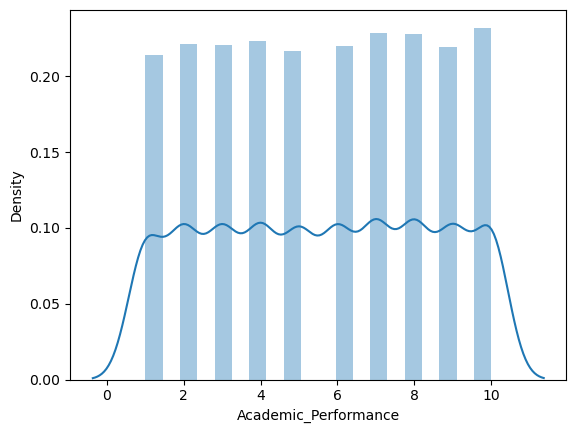

In [82]:
sns.distplot(dataset["Academic_Performance"])

In [68]:
dataset.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [72]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=5.546, Standard Deviation=2.873
The area between range(8,10):0.16384817116587239


C:\Users\SENTHIL-KUMAR-T-H\AppData\Local\Temp\ipykernel_8172\2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.16384817116587239

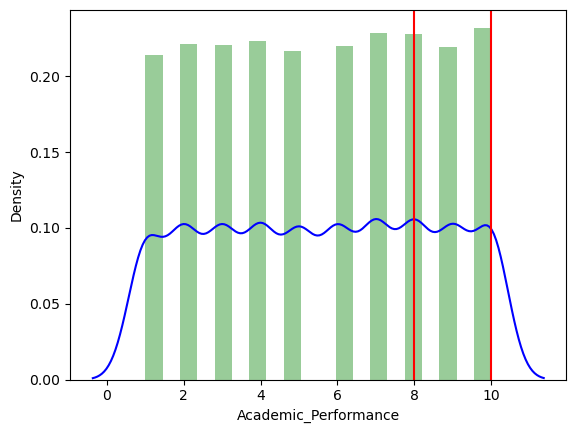

In [88]:
get_pdf_probability(dataset["Academic_Performance"],8,10)

In [94]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['Academic_Performance'])
ecdf(40)

1.0

# Bivariate

# covarience

In [100]:
dataset[quant].cov()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,224.215310,-0.056220,-0.060996,-0.311705,-0.167383,-0.481840,0.386490
Prev_Sem_Result,-0.056220,2.095311,2.087130,-0.023977,0.042660,-0.072513,0.045787
CGPA,-0.060996,2.087130,2.161315,-0.012494,0.053152,-0.077796,0.052655
Academic_Performance,-0.311705,-0.023977,-0.012494,8.256873,0.106911,-0.164484,-0.064828
Extra_Curricular_Score,-0.167383,0.042660,0.053152,0.106911,9.986252,0.034552,0.044044
Communication_Skills,-0.481840,-0.072513,-0.077796,-0.164484,0.034552,8.415022,-0.022330
Projects_Completed,0.386490,0.045787,0.052655,-0.064828,0.044044,-0.022330,2.944515


covariance difference between the 2 columns Academic_Performance and Extra_Curricular_Score difference between the 2 columns is 0.106911 and its a positivie covariance

Projects_Completed and CGPA difference between the 2 columns is 22.078774 and its a positivie covariance

# correlation

In [112]:
dataset[quant].corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,-0.002594,-0.002771,-0.007244,-0.003537,-0.011093,0.015042
Prev_Sem_Result,-0.002594,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
CGPA,-0.002771,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872
Academic_Performance,-0.007244,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148
Extra_Curricular_Score,-0.003537,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122
Communication_Skills,-0.011093,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486
Projects_Completed,0.015042,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000


correlation relationship between the 2 columns
Academic_Performance and salary Extra_Curricular_Score between the 2 columns is 0.106911 and its a positivie correlation

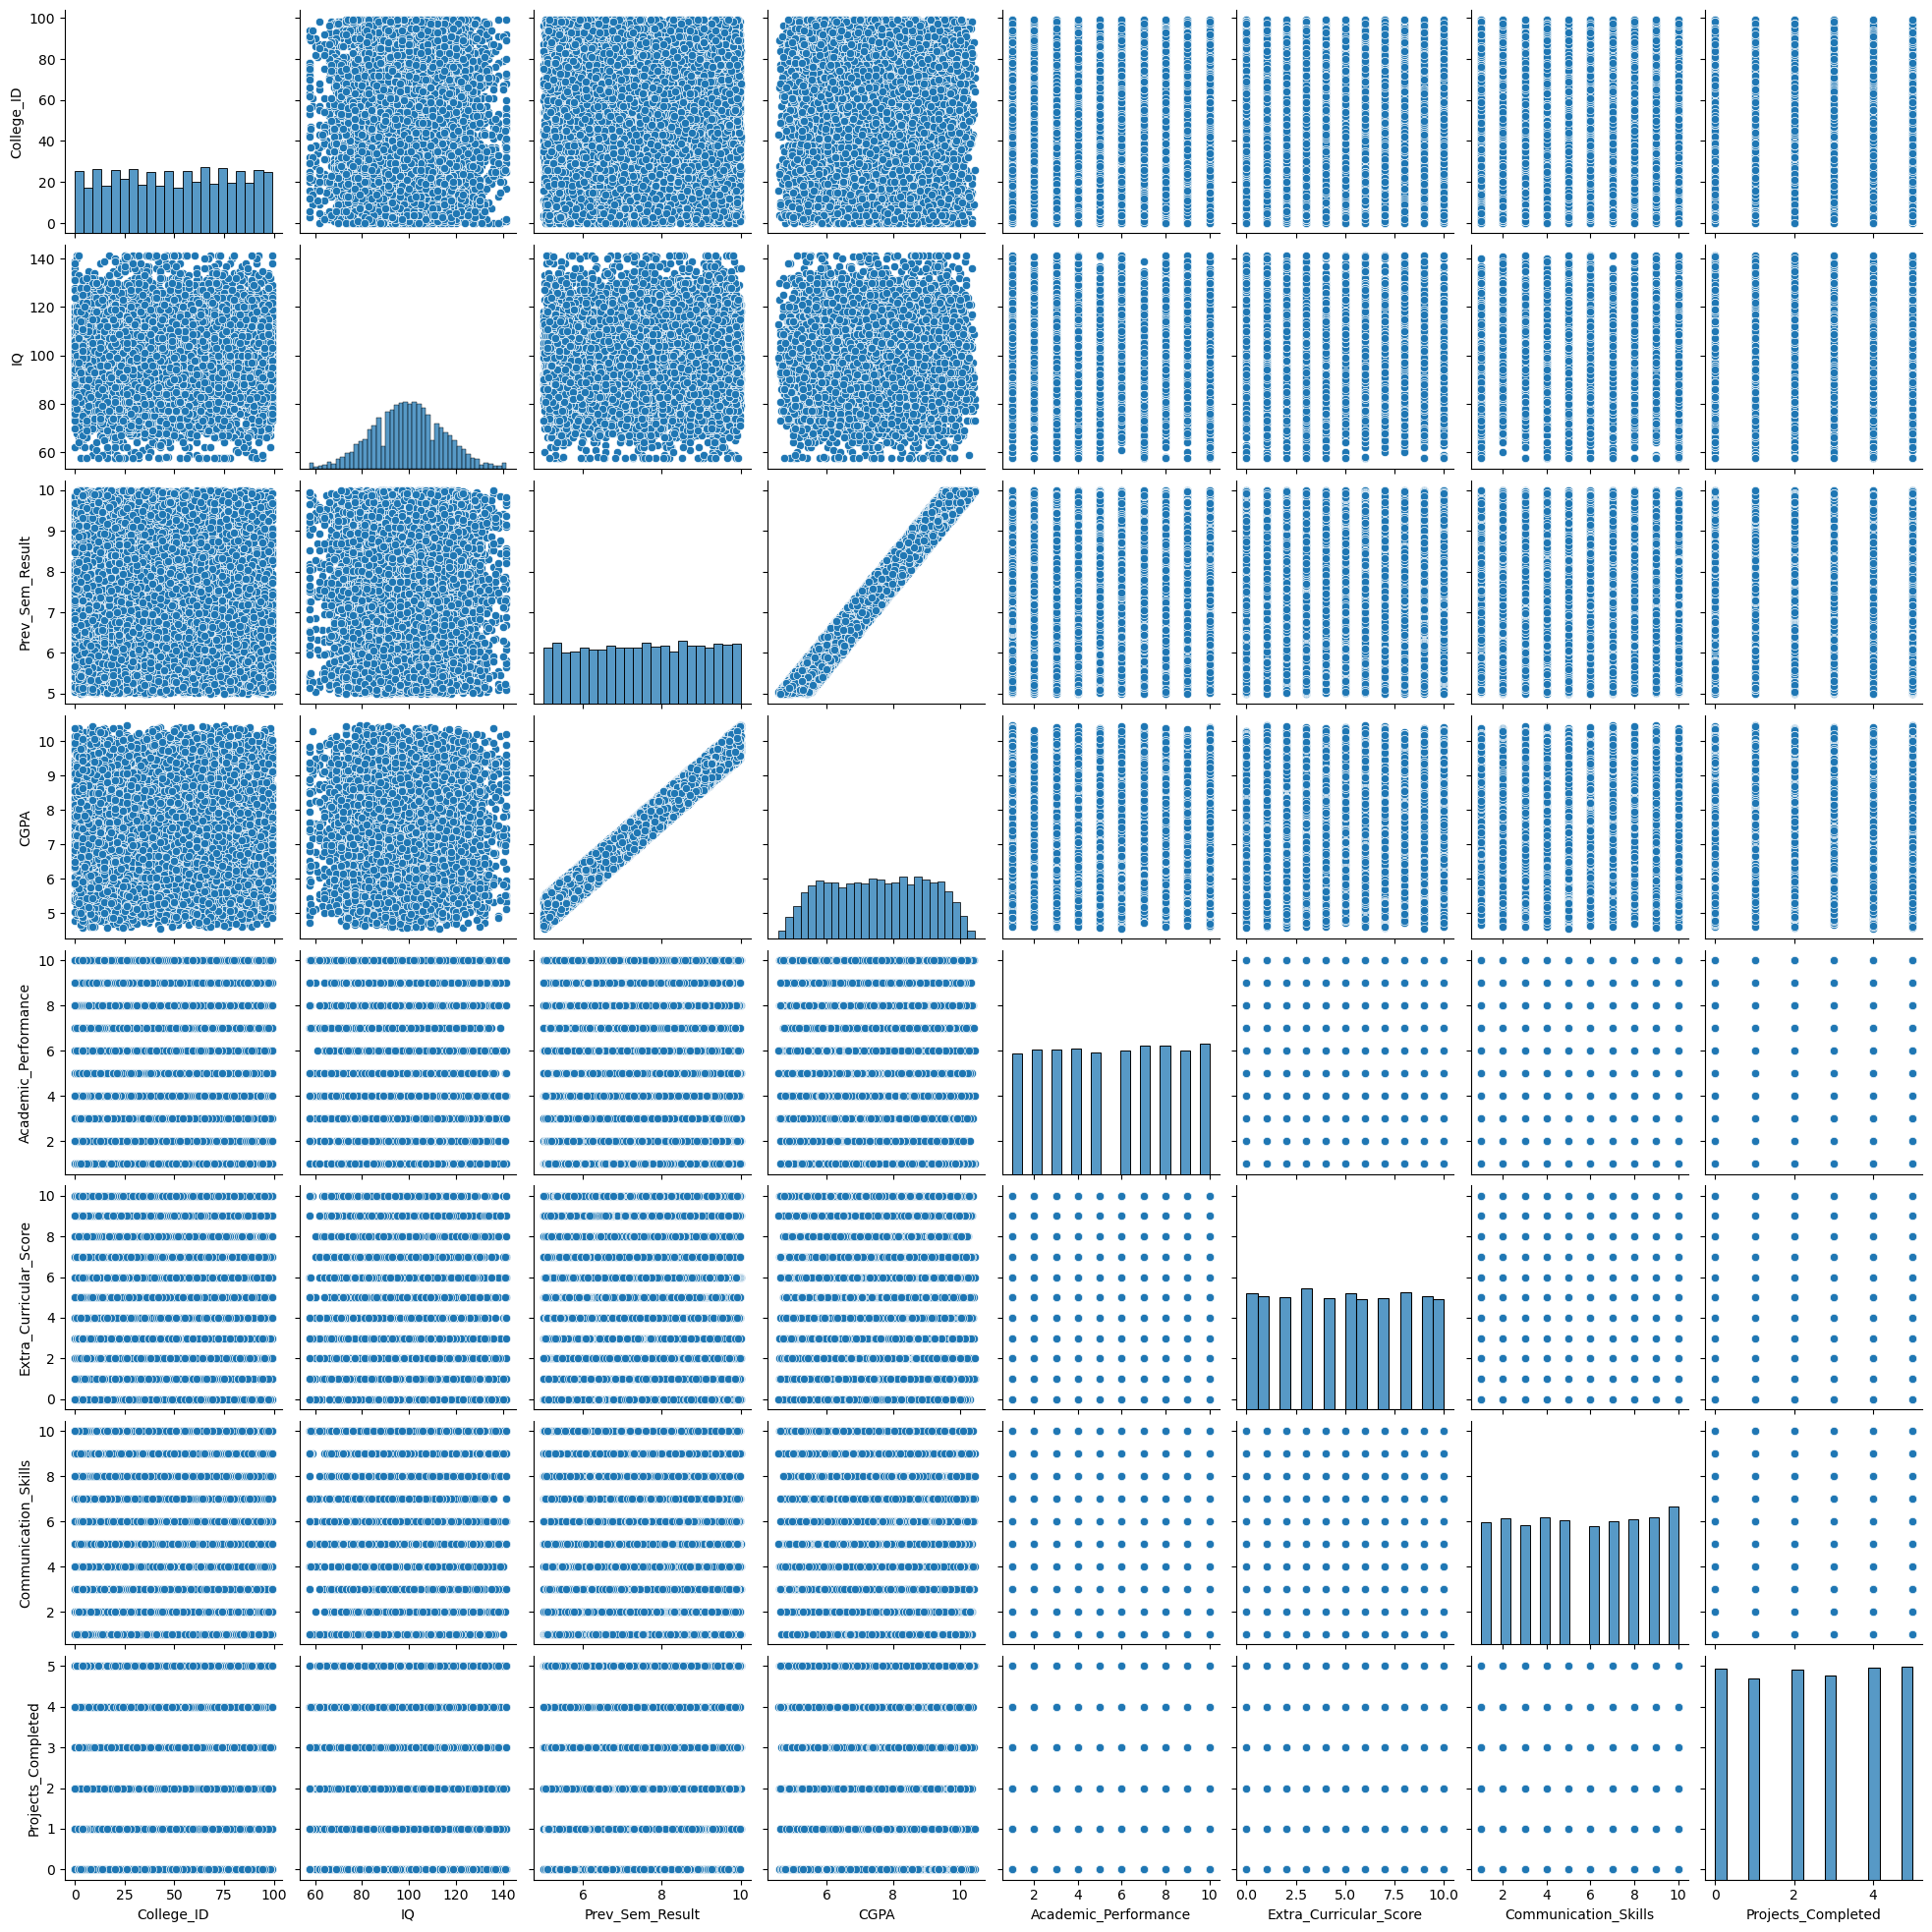

In [121]:
sns.pairplot(dataset)

In [151]:
dataset

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,29,107.0,6.61,6.28,8,No,8,8,4,No
1,60,97.0,5.52,5.37,8,No,7,8,0,No
2,35,109.0,5.36,5.83,9,No,3,1,1,No
3,54,122.0,5.47,5.75,6,Yes,1,6,1,No
4,3,96.0,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,20,119.0,8.41,8.29,4,No,1,8,0,Yes
9996,97,70.0,9.25,9.34,7,No,0,7,2,No
9997,65,89.0,6.08,6.25,3,Yes,3,9,5,No
9998,44,107.0,8.77,8.92,3,No,7,5,1,No


In [153]:
from scipy.stats import ttest_ind
male = dataset[dataset['Internship_Experience']=='No']['Projects_Completed']
female = dataset[dataset['Internship_Experience']=='Yes']['Projects_Completed']
#print(male)
ttest_ind(male, female)

TtestResult(statistic=1.0259938220821896, pvalue=0.3049193180325378, df=9998.0)